## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd

dados_adv = pd.read_csv('Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [2]:
dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [3]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [4]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

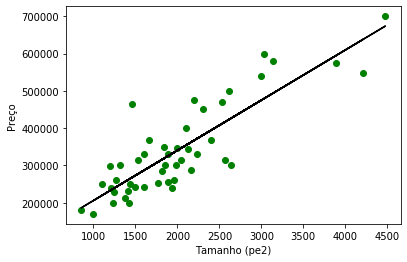

In [5]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [6]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [7]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851147


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




## Observando a predição de preços a partir do tamanho das casas

In [5]:
import pandas as pd


df_ph = pd.read_csv('Portland_housePrices.csv', index_col = None)

#df_ph.head()
df_ph.describe()

,tamanho,quartos,preco
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [6]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = df_ph.loc[:,['tamanho']]
y = df_ph.loc[:,['preco']]

resp_reg = LinearRegression().fit(X,y)   #X = atributo para treinamento ; y = resposta aprendida
resp_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#após treinado, vamos testar o modelo para predição

y_predict = resp_reg. predict(X[0:25])  #estipulei 50% das amostras para predição
y_predict



array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059],
       [474846.35560945],
       [338303.18857341],
       [277632.28381158],
       [263238.07802551],
       [256915.38950266],
       [272251.27230277],
       [332249.550626  ],
       [340321.06788921],
       [325523.28623999],
       [673674.73085997],
       [241848.557278  ],
       [380678.65420528],
       [248843.87223945],
       [237543.74807095],
       [422246.96811084],
       [479016.63952878],
       [308976.6758504 ],
       [325254.23566454],
       [287049.053952  ],
       [335209.10695584],
       [594573.86168047]])

* valores acima da média : Possíveis outliers : 
[474846.35560945], 
[673674.73085997],
[422246.96811084],
[479016.63952878]

* Como é somente uma variável para predição, vamos utilizar o método para avaliação gráfica dos resultados

Text(0, 0.5, 'Preço')

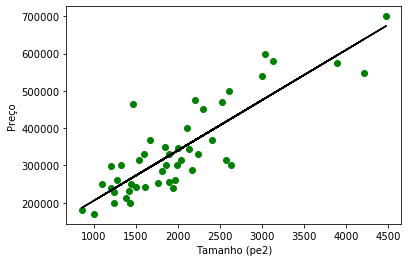

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, resp_reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

## Utilizando a variável quartos para predição de preços


In [14]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = df_ph.loc[:,['quartos']]
y = df_ph.loc[:,['preco']]

resp_reg = LinearRegression().fit(X,y)   #X = atributo para treinamento ; y = resposta aprendida
resp_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#após treinado, vamos testar o modelo para predição

y_predict = resp_reg. predict(X[0:50])  #estipulei 50% das amostras para predição
y_predict

array([[328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [255373.7100639 ],
       [400713.00559105],
       [400713.00559105],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [400713.00559105],
       [328043.35782748],
       [328043.35782748],
       [473382.65335463],
       [328043.35782748],
       [400713.00559105],
       [255373.7100639 ],
       [328043.35782748],
       [400713.00559105],
       [400713.00559105],
       [328043.35782748],
       [255373.7100639 ],
       [328043.35782748],
       [400713.00559105],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [328043.35782748],
       [255373.7100639 ],
       [182704.06230032],
       [400713.00559105],
       [328043.35782748],
       [400713.00559105],
       [328043.35782748],
       [328043.35782748],
       [400713.00559105],
       [4007

Text(0, 0.5, 'Preço')

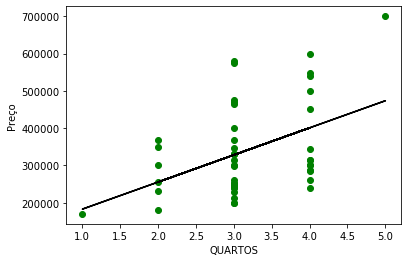

In [21]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, resp_reg.predict(X),color='k')
plt.xlabel('QUARTOS')
plt.ylabel('Preço')

Observa-se que somente a variavel quartos nao é suficiente para predizer os valores de preço, pois, embora seu comportamento seja linear (qde de quartos implica em maior preço), as amostras parecem estar bem dispersas em relação a reta de aproximação , implicando em um maior erro para convergência de acertos do algoritmo.

### Explorações adicionais para estudos ; Predição de quartos pelo tamanho da casa

In [23]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X1 = df_ph.loc[:,['tamanho']]
X2 = df_ph.loc[:,['quartos']]


resp_reg = LinearRegression().fit(X1,X2)   #X = atributo para treinamento ; y = resposta aprendida
resp_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#após treinado, vamos testar o modelo para predição

y_predict = resp_reg. predict(X2)  
y_predict

array([[2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09850627],
       [2.09957868],
       [2.09957868],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09957868],
       [2.09904247],
       [2.09904247],
       [2.10011489],
       [2.09904247],
       [2.09957868],
       [2.09850627],
       [2.09904247],
       [2.09957868],
       [2.09957868],
       [2.09904247],
       [2.09850627],
       [2.09904247],
       [2.09957868],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09904247],
       [2.09850627],
       [2.09797006],
       [2.09957868],
       [2.09904247],
       [2.09957868],
       [2.09904247],
       [2.09904247],
       [2.09957868],
       [2.09957868],
       [2.09957868],
       [2.09850627],
       [2.09904247],
       [2.09957868],
       [2.09904247],
       [2.09850627],
       [2.09957868],
       [2.09904247]])

Text(0, 0.5, 'Quartos')

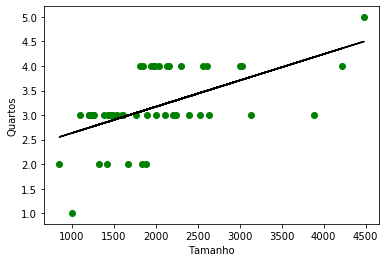

In [29]:
from matplotlib import pyplot as plt

plt.scatter(X1, X2,color='g')
plt.plot(X1, resp_reg.predict(X1),color='k')
plt.xlabel('Tamanho')
plt.ylabel('Quartos')

Não é possível prever pois o valor não é tão linear (qto mais quartos maior o preço - em muitos casos a mesma qde de quartos apresenta valores distintos para a casa)

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [31]:
import pandas as pd

dados_adv = pd.read_csv('Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [32]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
x_tv = dados_adv.loc[:,['TV']]
x_radio = dados_adv.loc[:,['radio']]
x_news = dados_adv.loc[:,['newspaper']]


y_sales =  dados_adv.loc[:,['sales']]


#teste 1
resp_reg_tv = LinearRegression().fit(x_tv,y_sales)  

#teste 2
resp_reg_radio = LinearRegression().fit(x_radio,y_sales)

#teste 3
resp_reg_news = LinearRegression().fit(x_news,y_sales)

In [44]:
y_tv_predsales = resp_reg_tv.predict(x_tv)
y_tv_predsales

y_radsales = resp_reg_radio.predict(x_radio)
y_radsales

y_newssales = resp_reg_news.predict(x_news)
y_newssales


array([[16.13616948],
       [14.81806581],
       [16.14163879],
       [15.55095333],
       [15.54548402],
       [16.45338945],
       [13.63669488],
       [12.98584701],
       [12.40610017],
       [13.51090076],
       [13.67498005],
       [12.57017946],
       [15.95568226],
       [12.74519738],
       [14.8672896 ],
       [15.24467198],
       [18.5864203 ],
       [15.40328196],
       [13.35229077],
       [13.39604525],
       [15.27201853],
       [13.63669488],
       [15.06418475],
       [13.78436625],
       [13.35229077],
       [13.41792249],
       [13.04054011],
       [13.60387902],
       [13.60387902],
       [14.58288549],
       [14.71414892],
       [14.46256067],
       [13.99220002],
       [12.367815  ],
       [12.756136  ],
       [12.81629841],
       [12.62487256],
       [14.85088167],
       [14.27113483],
       [14.10158622],
       [14.07970898],
       [14.46802998],
       [12.44985465],
       [13.79530487],
       [14.71961823],
       [14

Text(0, 0.5, 'sales')

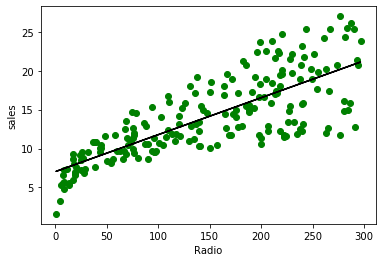

In [51]:
from matplotlib import pyplot as plt

plt.scatter(x_tv, y_sales ,color='g')
plt.plot(x_tv, y_tv_predsales,color='k')
plt.xlabel('Radio')
plt.ylabel('sales')


Text(0, 0.5, 'sales')

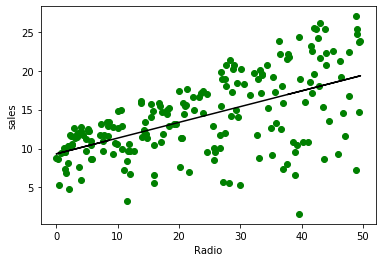

In [49]:
from matplotlib import pyplot as plt

plt.scatter(x_radio, y_sales ,color='g')
plt.plot(x_radio, y_radsales,color='k')
plt.xlabel('Radio')
plt.ylabel('sales')


Text(0, 0.5, 'sales')

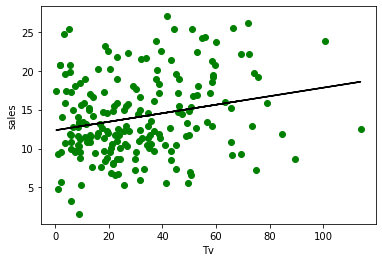

In [48]:
plt.scatter(x_news, y_sales ,color='g')
plt.plot(x_news, y_newssales,color='k')
plt.xlabel('Tv')
plt.ylabel('sales')




Resposta: A variável que apresenta maior aproximação em relação à predição do algoritmo é a tv

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [8]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'Preço')

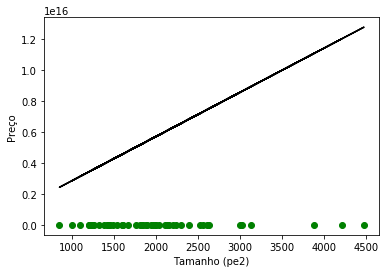

In [9]:
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 3

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


## Exercício 4


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?
